# 2 Numpy、Scipy、Pandas、Matplotlibの基礎

- **[2.1 Numpy、Scipy、Pandas、Matpltolibの基礎](#2.1-Numpy、Scipy、Pandas、Matpltolibの基礎)** 
    - [2.1.1 Numpyの基礎](#2.1.1-Numpyの基礎)
    - [2.1.2 Scipyの基礎](#2.1.2-Scipyの基礎)
    - [2.1.3 Pandasの基礎](#2.1.3-Pandasの基礎)
    - [2.1.4 Matplotlibの基礎](#2.1.4-Matplotlibの基礎)
<br><br>
- **[2.2 総合問題](#2.2-総合問題)**
    - [2.2.1 モンテカルロ法](#2.2.1-モンテカルロ法)


***

## 2.1 Numpy、Scipy、Pandas、Matpltolibの基礎
ゴール：Numpy、Scipy、Pandas、Matplotlibのモジュールを読み込みそれらの基本的な役割を知る

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 2.1.1 Numpyの基礎
キーワード：多次元配列、転置、行列の積、乱数、復元抽出、非復元抽出

この章では、データ分析でよく使われるPythonのモジュールNumpy、Scipy、Pandas、Matplotlibについて基礎的な使い方を学びます。これらのモジュールを扱ったのは、今後紹介する機械学習のsklearn等のモジュールのベースとなっており、またデータを前処理したり、可視化するのに非常に便利なツールだからです。ここではこれらの使い方の基本を紹介しますが、さらに詳しいことは次の章以降で学びます。

まずは、Numpyの基本的な使い方についてです。Numpyを使うと、多次元配列を処理することができます。実際に扱うデータは多次元であることが多く、その処理をするためにNumpyを使うと便利です。また、NumpyはCで実装されており、処理が高速です。

以下で、**import** モジュール名（numpy）でモジュールを読み込んでおり、**as** で短い名前（ここではnp）をつけます。これで該当のモジュールが使えるようになります。なお、%はマジックコマンドと言われJupyter Notebookで使える特殊変数ようなものです。以下はその1つであるprecisionを使って、小数点第3位まで結果を表示させるようにしています。他にも色々とありますので、都度紹介します。

In [2]:
# numpyモジュールの読み込み
import numpy as np

# 小数第３まで表示という意味
%precision 3

'%.3f'

まずは、1から10までの配列を作成してみましょう。np.と後にarrayをつけて、配列を作っています。(数字が綺麗に並んでないですが、後から並び替えをするためにわざと作っています。)

In [3]:
# 配列の作成
sample_numpy_data = np.array([9,2,3,4,10,6,7,8,1,5])
sample_numpy_data

array([ 9,  2,  3,  4, 10,  6,  7,  8,  1,  5])

次に、このデータの型をチェックするために、変数の後に「.」をつけて、dtypeを記述しています。以下の出力はintとありますので、整数型であることがわかります。これもオブジェクト型プログラミングの特徴です。ちなみに、「.」を入力後にタブ[tab]キーを押せば、その変数がもっているオブジェクトが表示されますので、そこから該当のものを選んで実行しましょう。そうすることで、すべてのオブジェクト等を正確に覚える必要はないですし、タイプミスも減ります。

In [4]:
# データの型
sample_numpy_data.dtype

dtype('int64')

>**[ポイント]**

>作業（コーディング）を早く正確にするためには、タブ[tab]を使いなそう

以下は、データの次元数と要素数を表示しています。ndimとsizeです。これを使うことで、データの大きさ等がどれくらいなのかわかります。

In [5]:
# 次元数
print("次元数:",sample_numpy_data.ndim)

# 要素数
print("要素数:",sample_numpy_data.size)

次元数: 1
要素数: 10


for文で書いた同じ結果（それぞれの数字を係数倍）も、Numpyを使うとだいぶ楽になります。

In [6]:
# それぞれの数字を係数倍（ここでは2倍）
sample_numpy_data * 2

array([18,  4,  6,  8, 20, 12, 14, 16,  2, 10])

それぞれの要素での掛け算や割り算も、for文などを使わずに簡単に計算できます。

In [7]:
# それぞれの要素同士での演算
print("掛け算:",np.array([1,2,3,4,5,6,7,8,9,10]) * np.array([10,9,8,7,6,5,4,3,2,1]))
print("累乗:",np.array([1,2,3,4,5,6,7,8,9,10]) **2)
print("割り算:",np.array([1,2,3,4,5,6,7,8,9,10]) / np.array([10,9,8,7,6,5,4,3,2,1]))

掛け算: [10 18 24 28 30 30 28 24 18 10]
累乗: [  1   4   9  16  25  36  49  64  81 100]
割り算: [  0.1     0.222   0.375   0.571   0.833   1.2     1.75    2.667   4.5    10.   ]


以下では、0や1のデータを作っています。「zeros」は全ての要素を0で作成し、「ones」は全ての要素を1で作成します。dtypeで型を指定しています。

In [8]:
# 0 や 1の初期化データ
# (2,3)は2行3列の行列データを作っています。
zero_data = np.zeros((2,3), dtype='i')
one_data = np.ones((2,3), dtype='f')

print("・0でint型　\n", zero_data)

print("・1でfloat型 \n", one_data)

・0でint型　
 [[0 0 0]
 [0 0 0]]
・1でfloat型 
 [[ 1.  1.  1.]
 [ 1.  1.  1.]]


次は、配列の数字をソート（並び替え）してみましょう。デフォルトでは、昇順（小さい数字から大きい数字）になります。

In [9]:
print("そのまま：",sample_numpy_data)

# ソート
sample_numpy_data.sort()
print("ソート後：",sample_numpy_data)

そのまま： [ 9  2  3  4 10  6  7  8  1  5]
ソート後： [ 1  2  3  4  5  6  7  8  9 10]


なお、降順（大きい数字から小さい数字）にしたい場合は、sample_numpy_data[::-1].sort()のように、**スライス**を使ってやります。[::-1]は、-1つずつ飛ばすという意味で、-1は逆からを意味するので、逆さから数字を1つずたどっていくことになります。

minやmaxを呼び出すことで、最小値や最大値なども求めることができます。これもオブジェクト指向の特徴です。積み上げcumsumは、前から順に足しあげていく演算です。

In [10]:
# 最小値
print("Min:",sample_numpy_data.min())
# 最大値
print("Max:",sample_numpy_data.max())
# 合計
print("Sum:",sample_numpy_data.sum())
# 積み上げ
print("Cum:",sample_numpy_data.cumsum())
# 積み上げ割合
print("Ratio:",sample_numpy_data.cumsum()/sample_numpy_data.sum())

Min: 1
Max: 10
Sum: 55
Cum: [ 1  3  6 10 15 21 28 36 45 55]
Ratio: [ 0.018  0.055  0.109  0.182  0.273  0.382  0.509  0.655  0.818  1.   ]


次は、乱数についてです。乱数とは、簡単にいうと規則性のないデタラメな数をいいます。乱数を発生するときには、Numpyを使うことが多く、計算するときには以下のようにします。10個の乱数を発生させています。seedはなくても大丈夫ですが、乱数を固定化し、のちの検証などで一定の値を担保できます。正規分布等については後で説明します。平均が0でデータの散らばり具合を意味する分散が1の確率分布に従うデータから数字を取り出します。

In [11]:
# 乱数の発生のためのモジュール読み込み
import numpy.random as random

# seedを設定することで乱数を固定化することができる
# これを設定しないと、テストなどでチェックするときに再現が困難になる
random.seed(0)

# 正規分布（平均0、分散1）の乱数を10個発生
norm_random_sample_data = random.randn(10)

print("乱数10個の配列:", norm_random_sample_data)

乱数10個の配列: [ 1.764  0.4    0.979  2.241  1.868 -0.977  0.95  -0.151 -0.103  0.411]


次は、発生させたデータの中から数字を抽出しています。random.choiceを使っています。replaceはデフォルトでTrueで、この場合は、データの中から重複を許してデータを抜き出す方法で、これを**復元抽出**と言います。一方、replaceをFalseに設定する場合はデータの重複を許さずにデータを抜き出す方法で、これを**非復元抽出**と言います。

In [12]:
# ランダム抽出
print(random.choice(norm_random_sample_data,10))# 10個を抽出（重複あり,復元抽出）
print(random.choice(norm_random_sample_data,10,replace=False)) # 10個を抽出（重複なし、非復元抽出)

[ 0.95  -0.151 -0.151 -0.103  0.4   -0.977  0.411 -0.103  0.411  1.868]
[ 1.868  0.4    0.95  -0.151  0.979 -0.103 -0.977  0.411  1.764  2.241]


復元抽出では、同じ数字が何個かあったりしますが、非復元抽出では、同じ数字が入ることはありません。

>**[やってみよう]**

>seed(0)の0を変えたり、ランダム抽出の数を増やしたりして、結果どうなっているか表示してみましょう。

次は、Numpyを用いた場合の計算時間の比較です。乱数を10の6乗コ発生させて、それを合計する実装です。一番はじめは普通の処理、2つ目がNumpyを使った処理です。

In [13]:
# Nは乱数の発生数、10の6乗
N = 10**6
# normal version (以下のrange(N)は0からN-1までの整数を用意しています。 _ はあとで変数として使用しないため、このように表現します。)
normal_sample_data = [random.random() for _ in range(N)]
# numpy version
numpy_random_data = np.array(normal_sample_data)

# calc time :合計値
%timeit sum(normal_sample_data)
%timeit np.sum(numpy_random_data)

100 loops, best of 3: 5.72 ms per loop
1000 loops, best of 3: 501 µs per loop


普通に演算するよりも、Numpyを使った方(np.sum())が早くなりました。%timeitは何回か同じ計算をして、ベスト3の平均計算時間を返しています。1つ目の「100 loops, best of 3: 5.78 ms per loop」は、100回計算して、ベスト3の計算時間平均が5.78ミリ秒という意味です。

>**[ポイント]**

>パフォーマンス等をあげたい場合は、%timeit を使いながら、計算時間をチェックしましょう。

次は、Numpyを使って、行列を作成しています。0〜8までの数字を3×3行列で表示しています。arrange(9)は0から8までの整数で、その後にreshapeで行列に変換しています。

In [14]:
# データの準備
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


行や列のみを抜き出す場合は、以下のようにします。[0,:]はインデックス0の行で、列はすべて取り出すという意味です。

In [15]:
# 行
sample_multi_array_data1[0,:]

array([0, 1, 2])

行や列のみを抜き出す場合は、以下のようにします。[:,0]はインデックス0の列で、行はすべて取り出すという意味です。

In [16]:
# 列
sample_multi_array_data1[:,0]

array([0, 3, 6])

行列の掛け算をしてみましょう。以下は、データの準備として、同じ行数と列数の行列を作成しています。

In [17]:
sample_multi_array_data2 = np.arange(9,18).reshape(3,3)
print(sample_multi_array_data2)

[[ 9 10 11]
 [12 13 14]
 [15 16 17]]


行列の掛け算では、dotを使います。なお、*を使うと、それぞれの要素を掛け算するだけなので、注意しましょう。

In [18]:
# 行列の積
np.dot(sample_multi_array_data1,sample_multi_array_data2)

array([[ 42,  45,  48],
       [150, 162, 174],
       [258, 279, 300]])

In [19]:
# 要素の積(注：行列の掛け算ではありません)
sample_multi_array_data1 * sample_multi_array_data2

array([[  0,  10,  22],
       [ 36,  52,  70],
       [ 90, 112, 136]])

#### <練習問題 1>

1から50までの自然数の和を計算するプログラムを書いて、最後の計算結果を表示させるプログラムを書いてください。ただし、Numpyを使ってください。

#### <練習問題 2>

正規分布に従う乱数を10個発生させて配列を作成してください。また、その中での最小値、最大値、合計を求めるプログラムを書いてください。

#### <練習問題 3>

要素がすべて3の5行5列の行列を作成し、その行列の2乗をする計算をしてみましょう。

### 2.1.2 Scipyの基礎
キーワード：逆行列、固有値、固有ベクトル、最適化

Scipyは科学技術計算をするためのモジュールで、多様な数学処理が可能です。ここでは、線形代数の逆行列や固有値、方程式の解などを求めてみましょう。なお、これらの用語がわからない方は、ネットで調べるか、以前紹介した参考文献で学習してください。

In [20]:
# Scipyのモジュール
import scipy as sp

# 線形代数用のモジュール
import scipy.linalg as linalg

# 最適化計算（最小値）用のモジュール
from scipy.optimize import minimize_scalar

以下は、ある行列に対して行列式を求めています。detを使います。

In [21]:
# サンプルデータ作成
sample_matrix_data = np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])

# 行列式
print("行列式")
print(linalg.det(sample_matrix_data))

行列式
-4.0


次は、逆行列です。invを使います。

In [22]:
# 逆行列
print("逆行列")
print(linalg.inv(sample_matrix_data))

逆行列
[[ 0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5  0. ]]


念のため、確認してみましょう。行列の積が単位行列になっていることがわかります。

In [23]:
# 確認
print(sample_matrix_data.dot(linalg.inv(sample_matrix_data)))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


次は、固有値と固有ベクトルを算出しています。

In [24]:
# 固有値と固有ベクトル
eig_value, eig_vector = linalg.eig(sample_matrix_data)

# 固有値と固有ベクトル
print("固有値")
print(eig_value)
print("固有ベクトル")
print(eig_vector)

固有値
[-1.+0.j  2.+0.j  2.+0.j]
固有ベクトル
[[ 0.577 -0.816  0.428]
 [ 0.577  0.408 -0.816]
 [ 0.577  0.408  0.389]]


次は最適化計算を使って、方程式の解を求めてみましょう。ここで計算する式として、

\begin{eqnarray}
f(x) = x^2 + 2x +1
\end{eqnarray}

の2次関数を考えます。もちろん、紙と鉛筆で計算することも可能で、解は-1ですが、解の近似計算でよく使われるニュートン法を使って求めてみましょう。まずは、上の関数を用意します。

In [25]:
# 関数の定義
def sample_function(x):
    return (x**2 + 2*x + 1)

次に、f(x)=0の解xを求めるために、以下でnewton関数を使います。newton関数の1つ目の引数が先ほど用意した関数sample_functionをセットし、2つ目の引数にはf(x)=0 の0をセットします。

In [26]:
# ニュートン法の読み込み
from scipy.optimize import newton

# 計算実行
print(newton(sample_function,0))

-0.9999999852953547


ほぼ-1になっているのがわかります。

なお、ニュートン法をはじめて聞いた方は検索をして調べるか、以下のサイト等を参考にしてください。

>[参考URL]

>https://ja.wikipedia.org/wiki/ニュートン法

>http://qiita.com/PlanetMeron/items/09d7eb204868e1a49f49

次に同じ関数で、最小値を求めることを考えます。ここでは、minimize_scalarを使うことにします。なお、パラメータでは、Brent 法を使っており、放物線補間法と黄金分割法（単峰関数の極値（極大値または極小値）を求める方法）を組み合わせた方法で、黄金分割法よりも収束が速いのが特徴です。この講座では、あまり使わないので、用語等については覚えなくても大丈夫ですが、これら以外にも色々なアプローチ方法がありますので、時間がある方は調べてみてください。

In [27]:
# 計算実行
print(minimize_scalar(sample_function,method="Brent"))

     fun: 0.0
    nfev: 5
     nit: 4
 success: True
       x: -1.0000000000000002


ここでScipyについては一旦終了します。次の章でさらに色々な科学計算（積分や微分方程式など）ができることを学びます。

>**[やってみよう]**

>上の関数を変更したりして、最小値等を計算を実行してみましょう。

#### <練習問題 1>

以下の行列について、行列式を求めてください。

$
  A = \left(
    \begin{array}{ccc}
      1 & 2 & 3 \\
      1 & 3 & 2 \\
      3 & 1 & 2
    \end{array}
  \right)
$

#### <練習問題 2>

上と同じ行列について、逆行列、固有値と固有ベクトルを求めてください。

#### <練習問題 3>

以下の関数が0となる解を求めてみましょう。

\begin{eqnarray}
f(x) = x^3 + 2x+ 1
\end{eqnarray}

### 2.1.3 Pandasの基礎
キーワード：Series、DataFrame、データの操作、データの結合、ソート

ここでは、Pandasについて学びます。Pandasを使うと、データの様々なハンドリングをスムーズに柔軟に実施することができ、表計算や後ほど学ぶデータベースのようなデータ操作が可能となります。以下で、必要となるモジュールを読み込んできます。

In [28]:
from pandas import Series,DataFrame
import pandas as pd

以下では、Seriesを使っています。これは、配列のようなオブジェクトです。インデックスも左に表示しています。

In [29]:
# Series
sample_pandas_data = pd.Series([0,1,2,3,4,5,6,7,8,9])
print(sample_pandas_data)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64


In [30]:
print("データの値:",sample_pandas_data.values)
print("インデックスの値:",sample_pandas_data.index)

データの値: [0 1 2 3 4 5 6 7 8 9]
インデックスの値: RangeIndex(start=0, stop=10, step=1)


もし、インデックスを数字ではなく、何か特定の文字などに置き換えたい場合は、以下のように宣言します。

In [31]:
# indexを文字で
sample_pandas_index_data = pd.Series([0,1,2,3,4,5,6,7,8,9]
                                     ,index=['a','b','c','d','e','f','g','h','i','j'])
print(sample_pandas_index_data)

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
dtype: int64


In [32]:
print("データの値:",sample_pandas_index_data.values)
print("インデックスの値:",sample_pandas_index_data.index)

データの値: [0 1 2 3 4 5 6 7 8 9]
インデックスの値: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


次は、DataFrameについてです。DataFrameは各々の列で異なる型を持たせることが可能です。

In [33]:
attri_data1 = {'ID':['100','101','102','103','104']
        ,'city':['Tokyo','Osaka','Kyoto','Hokkaidao','Tokyo']
        ,'birth_year':[1990,1989,1992,1997,1982]
        ,'name':['Hiroshi','Akiko','Yuki','Satoru','Steeve']}

attri_data_frame1 = DataFrame(attri_data1)

print(attri_data_frame1)

    ID  birth_year       city     name
0  100        1990      Tokyo  Hiroshi
1  101        1989      Osaka    Akiko
2  102        1992      Kyoto     Yuki
3  103        1997  Hokkaidao   Satoru
4  104        1982      Tokyo   Steeve


DataFrameも、インデックスの更新が可能です。

In [34]:
attri_data_frame_index1 = DataFrame(attri_data1,index=['a','b','c','d','e'])
print(attri_data_frame_index1)

    ID  birth_year       city     name
a  100        1990      Tokyo  Hiroshi
b  101        1989      Osaka    Akiko
c  102        1992      Kyoto     Yuki
d  103        1997  Hokkaidao   Satoru
e  104        1982      Tokyo   Steeve


行列の転置のように、ひっくり返す場合には、.Tを使います。

In [35]:
# 転置
attri_data_frame1.T

,0,1,2,3,4
ID,100,101,102,103,104
birth_year,1990,1989,1992,1997,1982
city,Tokyo,Osaka,Kyoto,Hokkaidao,Tokyo
name,Hiroshi,Akiko,Yuki,Satoru,Steeve


特定の列を指定したい場合は、データの後にカラム名をつけます。複数の場合は、複数のカラム名を指定しましょう。

In [36]:
# 列名の指定（１つ）
attri_data_frame1.birth_year

0    1990
1    1989
2    1992
3    1997
4    1982
Name: birth_year, dtype: int64

In [37]:
# 列名の指定(複数の場合)
attri_data_frame1[["ID","birth_year"]]

,ID,birth_year
0,100,1990
1,101,1989
2,102,1992
3,103,1997
4,104,1982


一定の条件を満たすものだけ、データを取り出すことも可能です。例えば、cityがTokyoのみのデータを抽出したい場合は、以下のようにします。

In [38]:
#　条件（フィルター）
attri_data_frame1[attri_data_frame1['city']=='Tokyo']

,ID,birth_year,city,name
0,100,1990,Tokyo,Hiroshi
4,104,1982,Tokyo,Steeve


値を複数の条件で取り出したい場合は、isin(リスト)を以下のようにして、使ってください。あとの章でも使います。

In [39]:
#　条件（フィルター、複数の値）
attri_data_frame1[attri_data_frame1['city'].isin(['Tokyo','Osaka'])]


,ID,birth_year,city,name
0,100,1990,Tokyo,Hiroshi
1,101,1989,Osaka,Akiko
4,104,1982,Tokyo,Steeve


>**[やってみよう]**

>他にも条件を変更（birth_yearが1990未満など）して、フィルターを実行してみましょう。

ある特定の列を削除する方法は以下のようになります。axisで軸を設定し、1の場合は列方向です。行の削除はインデックスを指定して、axis=0とします。

In [40]:
# データの列の削除
attri_data_frame1.drop(['birth_year'],axis=1)

,ID,city,name
0,100,Tokyo,Hiroshi
1,101,Osaka,Akiko
2,102,Kyoto,Yuki
3,103,Hokkaidao,Satoru
4,104,Tokyo,Steeve


次は、別のデータテーブルがあった時に、キーをベースにして、テーブルを結合する方法です。mergeを使います。なお、キーを明示しない場合は、自動で見つけて結合します。

In [41]:
# 別のデータの準備
attri_data2 = {'ID':['100','101','102','105','107']
        ,'math':[50,43,33,76,98]
        ,'English':[90,30,20,50,30]
        ,'sex':['M','F','F','M','M']}
attri_data_frame2 = DataFrame(attri_data2)
print(attri_data_frame2)

   English   ID  math sex
0       90  100    50   M
1       30  101    43   F
2       20  102    33   F
3       50  105    76   M
4       30  107    98   M


以下で結合しています。キーはIDで、100,101,102が共通であるため、それで結合しています。

In [42]:
# データのマージ（内部結合、詳しくは次の章で）
pd.merge(attri_data_frame1,attri_data_frame2)

,ID,birth_year,city,name,English,math,sex
0,100,1990,Tokyo,Hiroshi,90,50,M
1,101,1989,Osaka,Akiko,30,43,F
2,102,1992,Kyoto,Yuki,20,33,F


次はグループ集計といい、groupbyを使うことで、ある特定のカラムを軸にした集計ができます。以下は、性を軸として、数学のスコア平均を算出しています。他には、最大値や最小値等も算出できます。

In [43]:
# データのグループ集計(詳しくは次の章で)
attri_data_frame2.groupby("sex")["math"].mean()

sex
F    38.000000
M    74.666667
Name: math, dtype: float64

>**[やってみよう]**

>他にも変数を変えて、実行してみましょう。Englishの場合はどうなりますか。

もちろん、Pandasにはソート機能もあります。値だけではなく、インデックスをベースにソートできます。

In [44]:
# データの準備
attri_data2 = {'ID':['100','101','102','103','104']
        ,'city':['Tokyo','Osaka','Kyoto','Hokkaido','Tokyo']
        ,'birth_year':[1990,1989,1992,1997,1982]
        ,'name':['Hiroshi','Akiko','Yuki','Satoru','Steeve']}
attri_data_frame2 = DataFrame(attri_data2)
attri_data_frame_index2 = DataFrame(attri_data2,index=['e','b','a','d','c'])
print(attri_data_frame_index2)

    ID  birth_year      city     name
e  100        1990     Tokyo  Hiroshi
b  101        1989     Osaka    Akiko
a  102        1992     Kyoto     Yuki
d  103        1997  Hokkaido   Satoru
c  104        1982     Tokyo   Steeve


In [45]:
# indexによるソート
attri_data_frame_index2.sort_index()

,ID,birth_year,city,name
a,102,1992,Kyoto,Yuki
b,101,1989,Osaka,Akiko
c,104,1982,Tokyo,Steeve
d,103,1997,Hokkaido,Satoru
e,100,1990,Tokyo,Hiroshi


In [46]:
# 値によるソート、デフォルトは昇順
attri_data_frame_index2.birth_year.sort_values()

c    1982
b    1989
e    1990
a    1992
d    1997
Name: birth_year, dtype: int64

最後に、値があるかどうか、Nullの判定についてです。

以下は、attri_data_frame_index2にTokyoという文字列があるかどうかをisinで調べて、それぞれのセルにTrueかFalseが返されます。入っていればTrue、入っていなければFalseになっていることがわかります。

In [47]:
# 値があるかどうかの確認
attri_data_frame_index2.isin(["Tokyo"])

,ID,birth_year,city,name
e,False,False,True,False
b,False,False,False,False
a,False,False,False,False
d,False,False,False,False
c,False,False,True,False


次は、一部にnanをわざと入れて、isnullでそれぞれのセルを判定しています。

In [59]:
#　欠損値の取り扱い
# name をすべてnanにする
attri_data_frame_index2.name = np.nan
attri_data_frame_index2.isnull()

,ID,birth_year,city,name
e,False,False,False,True
b,False,False,False,True
a,False,False,False,True
d,False,False,False,True
c,False,False,False,True


In [60]:
# nullを判定し、合計する
attri_data_frame_index2.isnull().sum()

ID            0
birth_year    0
city          0
name          5
dtype: int64

以上で、Pandasの簡単な説明は終わりです。次の章で実際のデータのハンドリングをしますので、ここで学んだことはしっかりと身につけてください。

#### <練習問題 1>

以下のデータに対して、Moneyが500以上の人を絞り込んで、レコードを表示させてください。

In [1]:
from pandas import Series,DataFrame
import pandas as pd

attri_data1 = {'ID':['1','2','3','4','5']
        ,'sex':['F','F','M','M','F']
        ,'Money':[1000,2000,500,300,700]
        ,'name':['Saito','Horie','Kondo','Kawada','Matsubara']}

attri_data_frame1 = DataFrame(attri_data1)
print (attri_data_frame1)

  ID sex  Money       name
0  1   F   1000      Saito
1  2   F   2000      Horie
2  3   M    500      Kondo
3  4   M    300     Kawada
4  5   F    700  Matsubara


In [5]:
#　条件（フィルター、複数の値）
attri_data_frame1[attri_data_frame1['Money'] >= 500]


,ID,sex,Money,name
0,1,F,1000,Saito
1,2,F,2000,Horie
2,3,M,500,Kondo
4,5,F,700,Matsubara


#### <練習問題 2>

上記のデータに対して、男女別（MF別）の平均Moneyを求めてください。

In [6]:
attri_data_frame1.groupby("sex")["Money"].mean()

sex
F    1233.333333
M     400.000000
Name: Money, dtype: float64

#### <練習問題 3>

上記のデータに対して、以下のデータの同じIDの人をキーとして、データをマージしてください。そして、MoneyとMathとEnglishの平均を求めてください。

In [21]:
attri_data2 = {'ID':['3','4','7']
        ,'Math':[60,30,40]
        ,'English':[80,20,30]}

attri_data_frame2 = DataFrame(attri_data2)

In [25]:
pd.merge(attri_data_frame1,attri_data_frame2)

#a = pd.merge(attri_data_frame1,attri_data_frame2)


a.mean()

ID          17.0
Money      400.0
Math        45.0
English     50.0
dtype: float64

### 2.1.4 Matplotlibの基礎
キーワード：データビジュアライゼーション、散布図、ヒストグラム

データ分析をする上で、対象となるデータを可視化することはとても重要です。単に数字を眺めているだけでは、データに潜む傾向がなかなか見えなかったりしますが、データをビジュアル化することで、データ間の関係性なども見えてきます。特に、近年はインフォグラフィックスなどといって、可視化が注目されています。
ここでは、主にmatplotlibとseabornを使って、データを可視化する基本的な方法を身につけましょう。以下のサイトが参考になります。

>[参考URL]

>http://matplotlib.org/

>http://seaborn.pydata.org/

さらに以下の参考サイトは、pythonではなく、java scriptベースのプログラミングですが、データをビジュアル化するという意味では参考になります。

![dd](http://visualisingadvocacy.org/sites/visualisingadvocacy.org/files/D3-index.jpg)

参照：https://d3js.org

早速、必要なライブラリーを読み込みましょう。メインはmatplotlibで、seabornは図をさらにきれいにすることができます。

In [28]:
# matplotlib と seabornの読み込み
# seabornはきれいに図示できる
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ここで表示させるために必要なマジックコマンド
%matplotlib inline

まずは、散布図です。散布図は、2つの組み合わせデータに対して、x−y座標上に点をプロットしたグラフです。ここから2変数の関係性などが見えてきます。

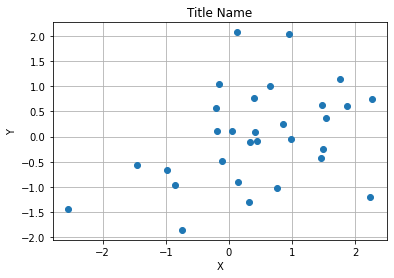

In [32]:
# 散布図
import numpy as np

import numpy.random as random

#　シード値の固定
random.seed(0)
# x軸のデータ
x = np.random.randn(30)
# y軸のデータ
y = np.sin(x) + np.random.randn(30)

# plot
plt.plot(x, y, "o")

#以下でも散布図が描ける
#plt.scatter(x, y)

# title
plt.title("Title Name")
# Xの座標名
plt.xlabel("X")
# Yの座標名
plt.ylabel("Y")

# gridの表示
plt.grid(True)

次もplotを使いますが、時系列など連続した（厳密には連続とみなした）曲線を描いています。

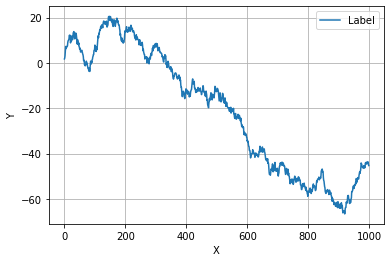

In [33]:
# 連続曲線
np.random.seed(0)
# データの範囲
numpy_data_x = np.arange(1000)

# 乱数の発生と積み上げ
numpy_random_data_y = np.random.randn(1000).cumsum()

# label=とlegendでラベルをつけることが可能
plt.plot(numpy_data_x,numpy_random_data_y,label="Label")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

subplot()でグラフを複数に分けることができます。以下は、2行1列のグラフを作成し、1番目と2番目と番号を指定して表示させています。なお、linspace(-10,10,100)は-10から10までの数を100コに分割した数字リストを取り出します。

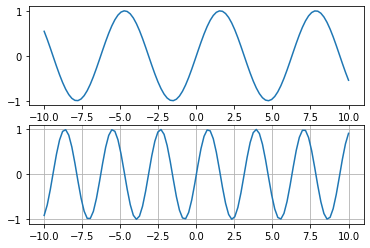

In [38]:
# sin関数

# 2行1列のグラフの1つ目
plt.subplot(2,1,1)
x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x)) 

# 2行1列のグラフの2つ目
plt.subplot(2,1,2)
y = np.linspace(-10, 10,100)
plt.plot(y, np.sin(2*y)) 

plt.grid(True)

次は、Scipyで扱った二次関数のグラフです。方程式の解の問題を考える際、数値計算しなくても図をみればおおよその解はわかります。

In [39]:
x = np.arange(-10, 10)
plt.plot(x, sample_function(x)) 
plt.grid(True)

NameError: name 'sample_function' is not defined

次のグラフは、ヒストグラムと言われ、それぞれの値の**度数**(値が出現する回数)を示します。データの全体像を観察するときに使われる図です。ここからどんな数値が多いのか、少ないのか、偏りがあるのかないのか見ていきます。

実装ではhistを使います。その中にあるパラメータは、対象となるデータ、ビンの数（幅、個数）、範囲を設定しています。他にも色々とパラメータがありますので、前と同様に?でチェックしてみてください。

In [86]:
?plt.hist

他、help(~)関数を使って、仕様を確認することができます。

In [87]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        array

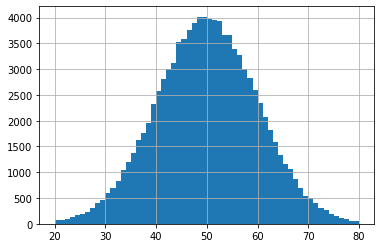

In [40]:
# histogram
random.seed(0)
plt.hist(np.random.randn(10**5)*10 + 50, bins=60,range=(20,80))
plt.grid(True)

以上で、Matplotlibの基礎、そしてデータ分析で使うPyhonのメインモジュール(Numpy、Scipy、Pandas)の基本的な紹介についてはこれで終わります。お疲れ様でした。ここで学んだテクニックは、次の記述統計で使ったり、さらに次の章で活用していきます。

#### <練習問題 1>

y = 5x + 3 (xは-10から10の値)のグラフを書いてみましょう。

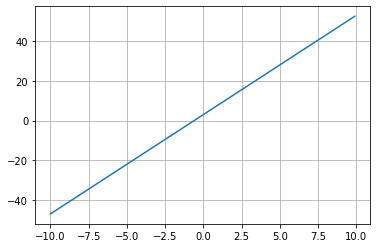

In [47]:
x = np.arange(-10, 10, 0.1) 

y = 5 * x + 3

plt.plot(x, y) 
plt.grid()

#### <練習問題 2>

先ほどのsin関数に加えて、cos関数のグラフも書いてください。

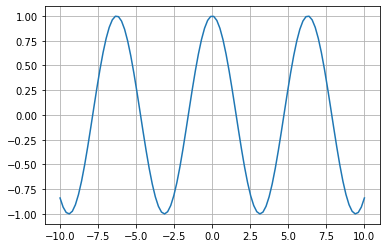

In [51]:
x = np.linspace(-10, 10,100)
#plt.plot(x, np.sin(x)) 
plt.grid()

plt.plot(x, np.cos(x)) 

#### <練習問題 3>

0から1の値をとる一様乱数を1000個、2組発生させて、それぞれのヒストグラムを書いてみましょう。結果はどうなっていますか。また、1000個だけではなく、100個や10000個などでも実施してみましょう。何かわかることはありますか。なお、それぞれのヒストグラムは別のグラフに表示するために、plt.subplotを利用してください。なお、一様乱数とは、ある数から数まで等確率で発生する乱数のことをいい、np.random.uniformを使ってください。

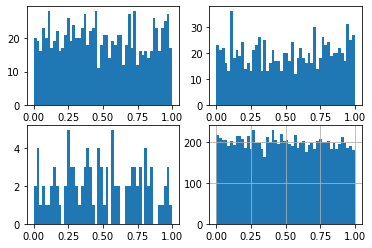

In [69]:
# histogram
random.seed(0)

plt.subplot(2,2,1)
exam33RandomArray1 = np.random.uniform(0, 1, 10**3)
plt.hist(exam33RandomArray1, bins=50,range=(0,1))

plt.subplot(2,2,2)
exam33RandomArray2 = np.random.uniform(0, 1, 10**3)
plt.hist(exam33RandomArray2, bins=50,range=(0,1))

plt.subplot(2,2,3)
exam33RandomArray3 = np.random.uniform(0, 1, 10**2)
plt.hist(exam33RandomArray3, bins=50,range=(0,1))

plt.subplot(2,2,4)
exam33RandomArray4 = np.random.uniform(0, 1, 10**4)
plt.hist(exam33RandomArray4, bins=50,range=(0,1))

plt.grid(True)


## 2.2 総合問題

### 2.2.1 モンテカルロ法

乱数を発生させる方法を使って、円周率を求めるプログラムを作成してみましょう。（なお、このアプローチを**モンテカルロ法**といいます）

（1）一様分布に従う乱数を2組発生させて、それぞれ10,000個の一様乱数を作ってみましょう。なお、一様乱数とは、ある数から数まで等確率で発生する乱数のことをいい、np.random.uniformを使います。使い方としては、0から1までの数を10個発生させる場合は、np.random.uniform(0.0, 1.0, 10)とします。

（2）x−y軸を使った中心(0,0)、半径1の円と、長さ1の正方形を考え、円の面積は$\pi$となり、正方形の面積は1となります。ここで先ほどのxとyの組み合わせの乱数10000個のうち、円の内部に入る点は何組あるでしょうか。ここで、円の内部に入るとは、x−y座標の原点から点 (x, y) のベクトルの長さを求め、それが1より小さくなる場合を判定基準とします。なお、その長さを求めるために、ユークリッドノルム($\sqrt{x^2 + y^2}$)を使い、 math.hypot(x,y)で計算できます。（さらに、余裕があれば、円の中に入ったxとyの組み合わせと外に出たxとyの組み合わせをプロットして図にしてみましょう。）

（3）半径1の1/4の円の面積と長さ1の長方形の面積の比は、$ \pi /4 : 1$となりますので、これと先ほどの結果を利用して、円周率を求めてみましょう。

7891 10000
3.1564


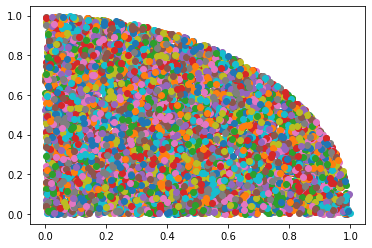

In [70]:
import math

exam41RandomArrayX = np.random.uniform(0.0, 1.0, 10**4)
exam41RandomArrayY = np.random.uniform(0.0, 1.0, 10**4)
insideCounter = 0

for x, y in zip(exam41RandomArrayX[:], exam41RandomArrayY[:]):
    if math.hypot(x, y) <= 1:
        insideCounter += 1
        plt.plot(x, y, 'o')

print(insideCounter, exam41RandomArrayX.shape[0])

# 四分円の面積 / 第一象限四角形の面積 = [1/4 * (1 * 1) * pi(四分円)] / [1 * 1] = 1/4 * pi
# -> pi = 4 * 四分円の面積 / 第一象限四角形の面積
montePi = 4 * (insideCounter / exam41RandomArrayX.shape[0])
print(montePi)